# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1543]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [1544]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [1545]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [1546]:


# Filtere die Wohnungen mit mehr als 10 Zimmern und Preis kleiner als 100
df = df_orig.loc[
    (df_orig['rooms'] <= 10) &  # Zimmeranzahl darf nicht größer als 10 sein
    (df_orig['price'] >= 100) &  # Preis muss mindestens 100 sein
    (df_orig['area'] <= 300) # Fläche darf nicht größer als 300 m^2 sein
]



### Shape (number of rows and colums)

In [1547]:
# Number of rows and columns
print(df.shape)


(779, 16)


### Data types

In [1548]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [1549]:
df.describe().round(1)

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0
mean,47.4,8.6,186.8,3.4,88.5,0.0,2658.0,33.6,161453.9,2507.4,177630.0,27.8,80525.2
std,0.1,0.1,81.5,1.3,39.7,0.1,1278.5,17.0,186610.1,1747.2,223758.0,7.5,14356.4
min,47.2,8.4,1.0,1.0,10.0,0.0,500.0,12.7,698.0,88.0,129.0,7.5,62000.5
25%,47.4,8.5,121.0,2.5,63.0,0.0,1849.5,23.4,8785.5,1044.6,3525.5,24.5,71059.8
50%,47.4,8.6,230.0,3.5,86.0,0.0,2392.0,28.0,27746.0,1662.6,19226.0,28.1,82240.2
75%,47.5,8.7,261.0,4.5,108.0,0.0,3050.0,38.2,420217.0,4779.0,491193.0,32.5,82932.7
max,47.7,8.9,298.0,8.5,282.0,1.0,9950.0,149.9,420217.0,4779.0,491193.0,46.2,174434.5


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [1550]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 779 Min: 500.0 Max: 9950.0 Mean: 2658.0 Median: 2392.0 Std: 1278.5
Area: Count: 779 Min: 10.0 Max: 282.0 Mean: 88.5 Median: 86.0 Std: 39.7


### Skewness

In [1551]:
df[['price','rooms', 'area']].skew()

price    2.183966
rooms    0.197055
area     0.873556
dtype: float64

### Kurtosis

In [1552]:
df[['price','rooms', 'area']].kurtosis()

price    6.926062
rooms    0.119028
area     1.913431
dtype: float64

### Extreme values

In [1553]:
#günstig
df[df['price_per_m2'] <= 20]


,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
9,1693998261-350,"Steinmaurstrasse 19B, 8173 Neerach, ZH",47.511902,8.470452,88,Neerach,5.5,191.0,0,3400.0,17.80,3175,525.662252,641.0,13.322835,111422.358722
42,1693998233-191,"Am Holbrig 2, 8049 Zürich, ZH",47.405014,8.495720,261,Zürich,3.5,90.0,0,1750.0,19.44,420217,4778.994655,491193.0,32.458468,82932.737704
282,1693998360-873,"Steinmürlistrasse 48, 8953 Dietikon, ZH",47.404366,8.392781,243,Dietikon,5.5,116.0,0,2258.0,19.47,27746,2970.663812,18911.0,46.226483,64662.737784
291,1693998214-77,"Oberdorfstrasse, 8934 Knonau, ZH",47.224941,8.461728,7,Knonau,4.0,240.0,0,3500.0,14.58,2378,367.542504,566.0,18.292683,79514.421053
304,1693998205-46,"Marktgasse 17, 8400 Winterthur, ZH",47.499710,8.729728,230,Winterthur,4.5,160.0,0,3200.0,20.00,113173,1662.597326,73339.0,24.535004,70118.996920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,1693998335-749,"Poststrasse 61, 8462 Rheinau, ZH",47.640228,8.600247,38,Rheinau,5.5,100.0,0,2000.0,20.00,1316,147.368421,694.0,19.680851,69832.166667
781,1693998373-942,"Dorfstr. 17, 8906 Bonstetten, ZH",47.314835,8.469243,3,Bonstetten,4.5,104.0,0,2055.0,19.76,5572,749.932705,1014.0,16.564968,88927.698145
782,1693998364-896,"Langenmattstrasse 14, 8617 Mönchaltorf, ZH",47.315971,8.719728,196,Mönchaltorf,4.5,98.0,0,1950.0,19.90,3898,513.570487,1360.0,17.162648,78699.937422
784,1693998373-960,"Isikerstrasse 26, 8335 Hittnau, ZH",47.370026,8.819698,173,Hittnau,4.5,130.0,0,2400.0,18.46,3664,282.934363,783.0,7.669214,77454.523667


In [1554]:
#teuer
df[df['price_per_m2'] >= 100]


,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
11,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich,2.0,32.0,0,3515.0,109.84,420217,4778.994655,491193.0,32.458468,82932.737704
20,1693998214-82,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3790.0,126.33,420217,4778.994655,491193.0,32.458468,82932.737704
21,1693998214-83,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,25.0,0,3490.0,139.60,420217,4778.994655,491193.0,32.458468,82932.737704
107,1693998280-434,"Neugasse 40, 8005 Zürich, ZH",47.382469,8.530180,261,Zürich,1.0,11.0,0,1120.0,101.82,420217,4778.994655,491193.0,32.458468,82932.737704
154,1693998305-585,"Steinstrasse 35, 8003 Zürich, ZH",47.366997,8.520324,261,Zürich,1.0,15.0,0,1500.0,100.00,420217,4778.994655,491193.0,32.458468,82932.737704
171,1693998309-621,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3890.0,129.67,420217,4778.994655,491193.0,32.458468,82932.737704
185,1693998317-658,"8004 Zürich, ZH",47.380417,8.525352,261,Zürich,1.0,10.0,0,1499.0,149.90,420217,4778.994655,491193.0,32.458468,82932.737704


In [1555]:
# Berechne die Perzentile
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Definiere Ausreißer basierend auf der 1.5-fachen interquartilen Spannweite
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Zeige die berechneten Schwellenwerte an
print(f"Untere Grenze für Ausreißer: {lower_bound}")
print(f"Obere Grenze für Ausreißer: {upper_bound}")


Untere Grenze für Ausreißer: -4.5
Obere Grenze für Ausreißer: 175.5


### subset outliers entfernen mit loc

In [1556]:
#mit outliers
df.describe().round(1)

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0,779.0
mean,47.4,8.6,186.8,3.4,88.5,0.0,2658.0,33.6,161453.9,2507.4,177630.0,27.8,80525.2
std,0.1,0.1,81.5,1.3,39.7,0.1,1278.5,17.0,186610.1,1747.2,223758.0,7.5,14356.4
min,47.2,8.4,1.0,1.0,10.0,0.0,500.0,12.7,698.0,88.0,129.0,7.5,62000.5
25%,47.4,8.5,121.0,2.5,63.0,0.0,1849.5,23.4,8785.5,1044.6,3525.5,24.5,71059.8
50%,47.4,8.6,230.0,3.5,86.0,0.0,2392.0,28.0,27746.0,1662.6,19226.0,28.1,82240.2
75%,47.5,8.7,261.0,4.5,108.0,0.0,3050.0,38.2,420217.0,4779.0,491193.0,32.5,82932.7
max,47.7,8.9,298.0,8.5,282.0,1.0,9950.0,149.9,420217.0,4779.0,491193.0,46.2,174434.5


In [1557]:
min_price_per_m2 = 40
max_price_per_m2 = 90
lower_bound = 30
upper_bound = 100

df_no_outliers = df.loc[
    (df['price_per_m2'] > min_price_per_m2) & 
    (df['price_per_m2'] < max_price_per_m2)&
    (df['area'] > lower_bound) & 
    (df['area'] <= upper_bound)
]

df_no_outliers.describe().round(1)


,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0
mean,47.4,8.5,246.3,2.5,60.7,0.0,3108.4,51.7,365662.3,4344.7,425697.2,31.9,84503.7
std,0.0,0.0,44.4,0.8,19.2,0.1,1073.4,10.4,136745.5,1119.5,163618.8,2.7,12572.2
min,47.3,8.4,62.0,1.0,31.0,0.0,1440.0,40.7,2515.0,663.4,295.0,18.1,70119.0
25%,47.4,8.5,261.0,2.0,45.0,0.0,2380.0,44.1,420217.0,4779.0,491193.0,32.5,82932.7
50%,47.4,8.5,261.0,2.5,58.0,0.0,2900.0,48.5,420217.0,4779.0,491193.0,32.5,82932.7
75%,47.4,8.6,261.0,3.0,73.0,0.0,3730.0,55.5,420217.0,4779.0,491193.0,32.5,82932.7
max,47.5,8.8,261.0,4.5,100.0,1.0,6590.0,88.5,420217.0,4779.0,491193.0,37.8,164756.7


### Get a list of categories of categorical variable

In [1558]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Brütten', 'Bülach', 'Dielsdorf', 'Dietikon',
       'Dietlikon', 'Dättlikon', 'Dübendorf', 'Dürnten', 'Egg', 'Eglisau',
       'Elsau', 'Embrach', 'Fehraltorf', 'Feuerthalen',
       'Freienstein-Teufen', 'Fällanden', 'Glattfelden', 'Gossau (ZH)',
       'Greifensee', 'Hausen am Albis', 'Hedingen', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hittnau', 'Hochfelden', 'Hombrechtikon',
       'Höri', 'Hüttikon', 'Kloten', 'Knonau', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Mönchaltorf',
       'Neerach', 'Neftenbach', 'Niederglatt', 'Niederhasli',
       'Niederweningen', 'Nürensdorf', 'Oberengstringen', 'Oberglatt',
       'Obfelden', 'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon',
       'Ossingen', 'Pfungen', 'Pfäffikon', 'Regensd

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [1559]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.5
luxurious,,,,,,,,,,,,,,,
0,51,36,39,135,44,200,28,163,3,52,2,11,2,3,1
1,0,0,0,6,0,3,0,0,0,0,0,0,0,0,0


### Pivot tables

In [1560]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            51   32.529412    51  1330.274510           51  50.940980
1.5   0            36   35.333333    36  2110.166667           36  65.455000
2.0   0            39   54.589744    39  2155.846154           39  42.528462
2.5   0           135   66.800000   135  2382.755556          135  37.010000
      1             6   72.166667     6  3339.500000            6  45.978333
3.0   0            44   68.159091    44  1964.022727           44  28.677955
3.5   0           200   89.770000   200  2648.980000          200  29.494700
      1             3  101.666667     3  6036.666667            3  59.826667
4.0   0            28   98.464286    28  2852.357143           28  29.646429
4.5   0           163  114.926380   163  3086.570552          163  26.493436
5.0   0             3  108.000000     3  2881.666667            3  26.376667
5.5   0            52  153.250000    52  3590.653846           52  23.587500
6.0   0             2  185.000000     2  3800.000000            2  22.365000
6.5   0            11  167.363636    11  4114.272727           11  24.638182
7.0   0             2  175.000000     2  6350.000000            2  36.325000
7.5   0             3  205.000000     3  4765.000000            3  23.273333
8.5   0             1  210.000000     1  8500.000000            1  40.480000

### Correlation matrix

In [1561]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.985822,0.479152,-0.532678,-0.619633,-0.700451
area,0.985822,1.000000,0.619602,-0.383158,-0.479148,-0.570770
price,0.479152,0.619602,1.000000,0.487598,0.391847,0.290604
price_per_m2,-0.532678,-0.383158,0.487598,1.000000,0.994115,0.976874
pop_dens,-0.619633,-0.479148,0.391847,0.994115,1.000000,0.994190
frg_pct,-0.700451,-0.570770,0.290604,0.976874,0.994190,1.000000


### Covariance matrix

In [1562]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.657217,42.914421,7.598065e+02,-10.491898,-7.331827e+02,-2.663608
area,42.914421,1576.481664,3.049288e+04,-316.260311,-1.915080e+04,-78.540447
price,759.806495,30492.883184,1.634452e+06,5549.872054,6.426238e+05,906.988044
price_per_m2,-10.491898,-316.260311,5.549872e+03,288.248234,1.758189e+04,42.928937
pop_dens,-733.182748,-19150.799817,6.426238e+05,17581.892700,3.052709e+06,8660.523066
frg_pct,-2.663608,-78.540447,9.069880e+02,42.928937,8.660523e+03,56.967640


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

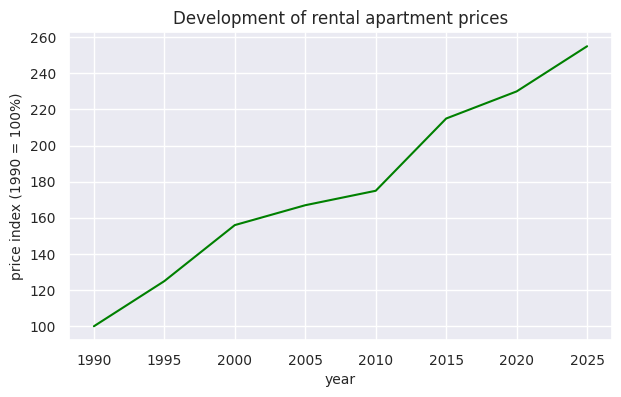

In [1563]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

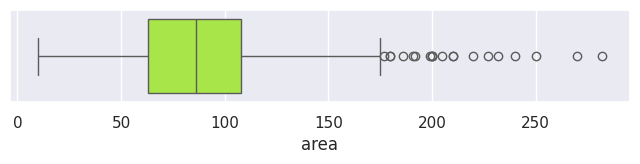

In [1564]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

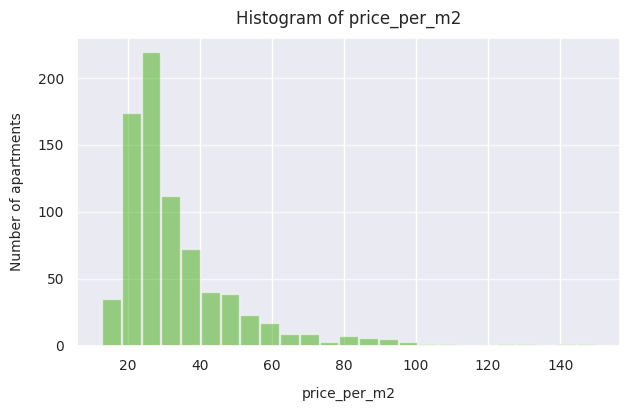

In [1565]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

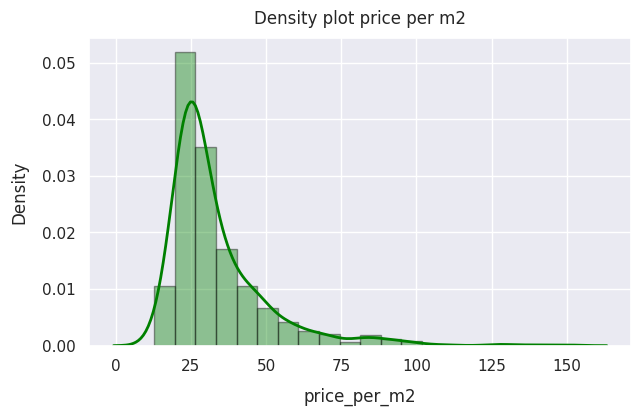

In [1566]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
185   10.0 -1.976971
107   11.0 -1.951785
190   14.0 -1.876228
52    15.0 -1.851042
154   15.0 -1.851042
..     ...       ...
401  232.0  3.614274
291  240.0  3.815760
205  250.0  4.067618
686  270.0  4.571334
445  282.0  4.873563

[779 rows x 2 columns]


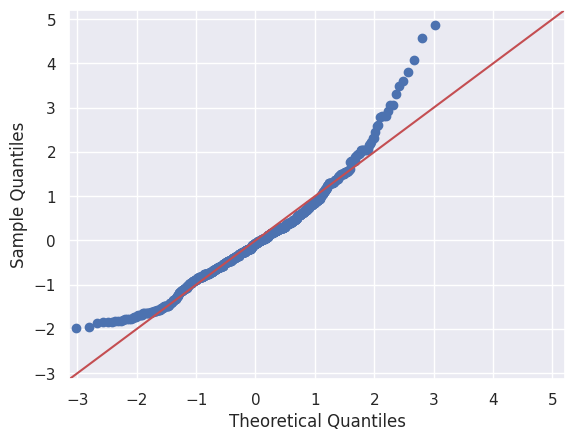

In [1567]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [1568]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[8.5, 7.0, 6.0, 5.0, 7.5, 6.5, 4.0, 1.5, 2.0, 3.0, 1.0, 5.5, 2.5, 4.5, 3.5]

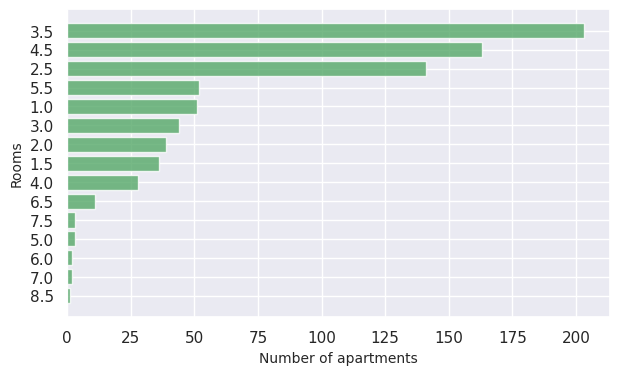

In [1569]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

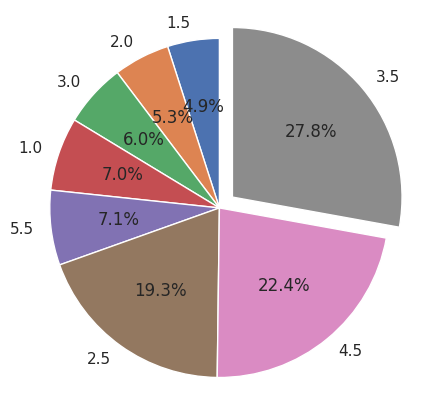

In [1570]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

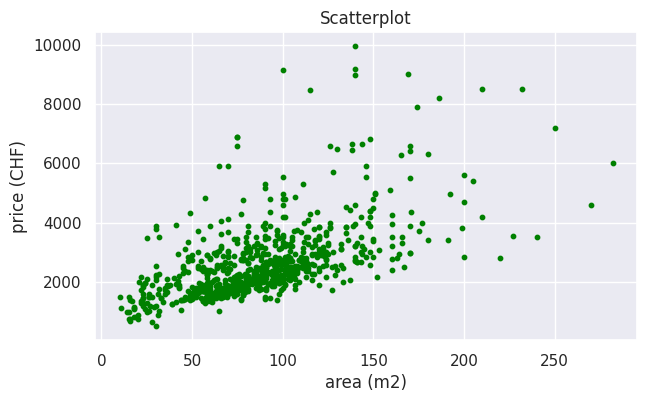

In [1571]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(766, 17)
18.93432464773586
992.1070393150562


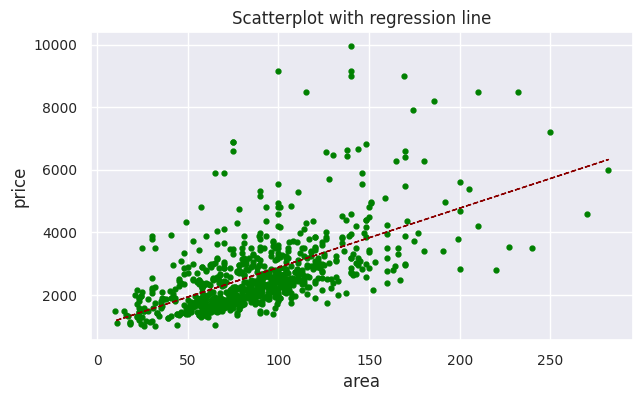

In [1572]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

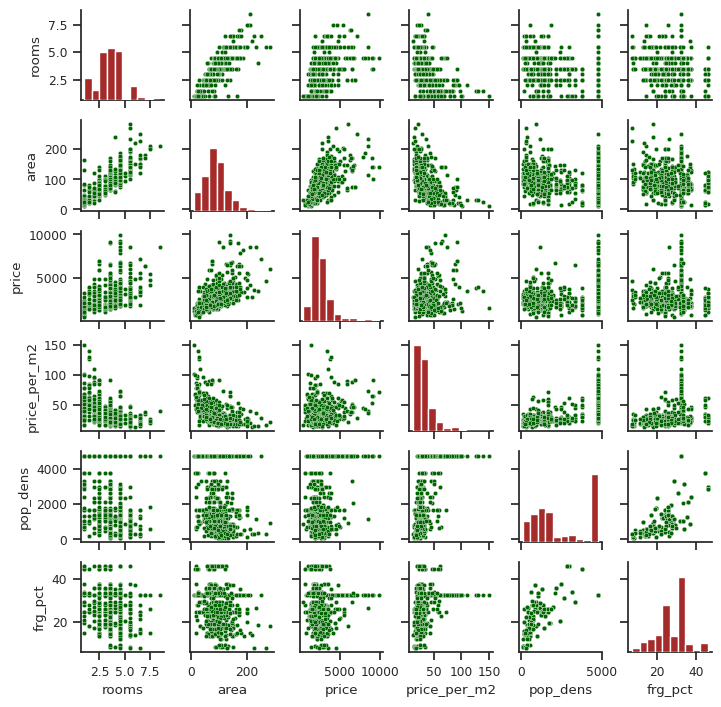

In [1573]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(748, 17)


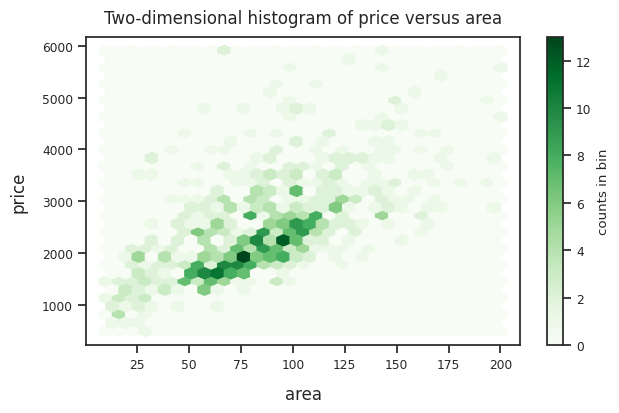

In [1574]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

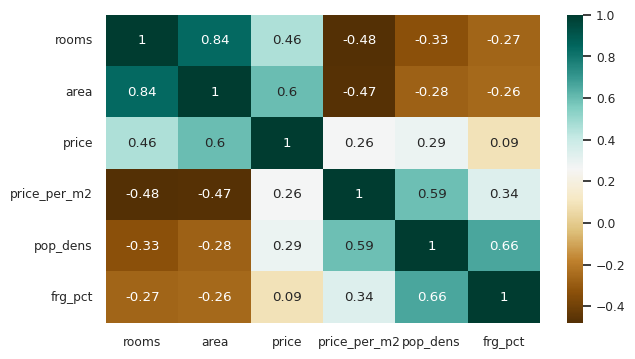

In [1575]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

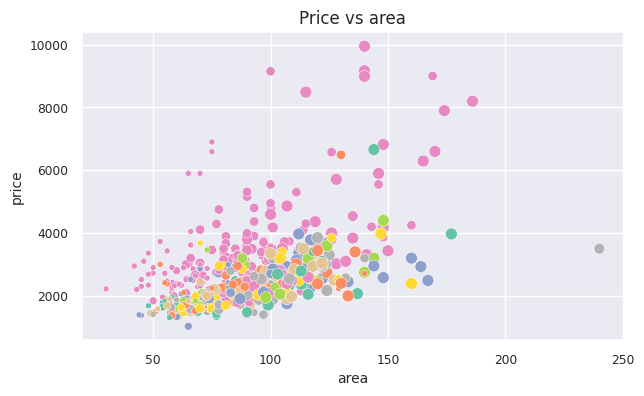

In [1576]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [1577]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-18 11:16:07
Python Version: 3.11.10
-----------------------------------
